In [ ]:
! pip install pandas

In [ ]:
! pip install pandas matplotlib

In [25]:
! pip install pandas scikit-learn matplotlib seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('../datasets/dataset_lixo2.csv')

In [17]:
df.head()

,País,Ano,PIB (US$),População,Lixo Orgânico (Ton),Lixo Papel (Ton),Lixo Metal (Ton),Lixo Plástico (Ton),Lixo Vidro (Ton),Lixo Madeira (Ton),Lixo Borracha (Ton),Lixo Entulho (Ton),Lixo Médico (Ton),Outros Lixos (Ton),Total Lixo (Ton),Lixo Reciclado (Ton),Meta de Reciclagem 40% sim(1) ou nao(0),Teve Aumento Populacional comparado ao ano anterior sim(1) ou nao(0),Teve Aumento do PIB comparado ao ano anterior sim(1) ou nao(0)
0,Brasil,2014,2416000000000,202600000,18100000.0,7400000.0,2900000.0,4400000.0,1650000.0,800000.0,300000.0,2500000.0,400000.0,100000.0,79700000,32000000.0,1.0,0.0,0.0
1,Brasil,2015,2418000000000,204500000,18500000.0,7600000.0,2950000.0,4500000.0,1700000.0,850000.0,320000.0,2600000.0,450000.0,110000.0,81300000,33000000.0,1.0,1.0,1.0
2,Brasil,2016,2384000000000,206100000,19000000.0,7800000.0,3000000.0,4600000.0,1750000.0,900000.0,350000.0,2700000.0,500000.0,120000.0,83000000,34000000.0,1.0,1.0,0.0
3,Brasil,2017,2056000000000,207660000,20000000.0,8000000.0,3100000.0,4800000.0,1800000.0,950000.0,370000.0,2800000.0,550000.0,130000.0,85000000,35000000.0,1.0,1.0,0.0
4,Brasil,2018,2064000000000,209300000,21000000.0,8200000.0,3200000.0,4900000.0,1850000.0,1000000.0,400000.0,2900000.0,600000.0,140000.0,87000000,36000000.0,1.0,1.0,1.0


In [18]:
df.columns

Index(['País', 'Ano', 'PIB (US$)', 'População', 'Lixo Orgânico (Ton)',
       'Lixo Papel (Ton)', 'Lixo Metal (Ton)', 'Lixo Plástico (Ton)',
       'Lixo Vidro (Ton)', 'Lixo Madeira (Ton)', 'Lixo Borracha (Ton)',
       'Lixo Entulho (Ton)', 'Lixo Médico (Ton)', 'Outros Lixos (Ton)',
       'Total Lixo (Ton)', 'Lixo Reciclado (Ton)',
       'Meta de Reciclagem 40% sim(1) ou nao(0)',
       'Teve Aumento Populacional comparado ao ano anterior sim(1) ou nao(0)',
       'Teve Aumento do PIB comparado ao ano anterior sim(1) ou nao(0)'],
      dtype='object')

In [ ]:
# Funções calcular e preencher coluna

def verificar_reciclagem(df):
    # Verificar se a meta de reciclagem de 40% foi atingida
    df['Meta de Reciclagem 40% sim(1) ou nao(0)'] = df.apply(
        lambda row: 1 if row['Lixo Reciclado (Ton)'] >= 0.4 * row['Total Lixo (Ton)'] else 0, axis=1)
    return df

def verificar_aumento_populacional(df):
    # Verificar se houve aumento populacional comparado ao ano anterior
    df['Teve Aumento Populacional comparado ao ano anterior sim(1) ou nao(0)'] = df['População'].diff().apply(
        lambda x: 1 if x > 0 else 0)
    return df

def verificar_aumento_pib(df):
    # Verificar se houve aumento do PIB comparado ao ano anterior
    df['Teve Aumento do PIB comparado ao ano anterior sim(1) ou nao(0)'] = df['PIB (US$)'].diff().apply(
        lambda x: 1 if x > 0 else 0)
    return df

# Aplicar as funções no DataFrame
df = verificar_reciclagem(df)
df = verificar_aumento_populacional(df)
df = verificar_aumento_pib(df)

# Salvar o DataFrame atualizado de volta no CSV
df.to_csv('../datasets/dataset_lixo2.csv', index=False)


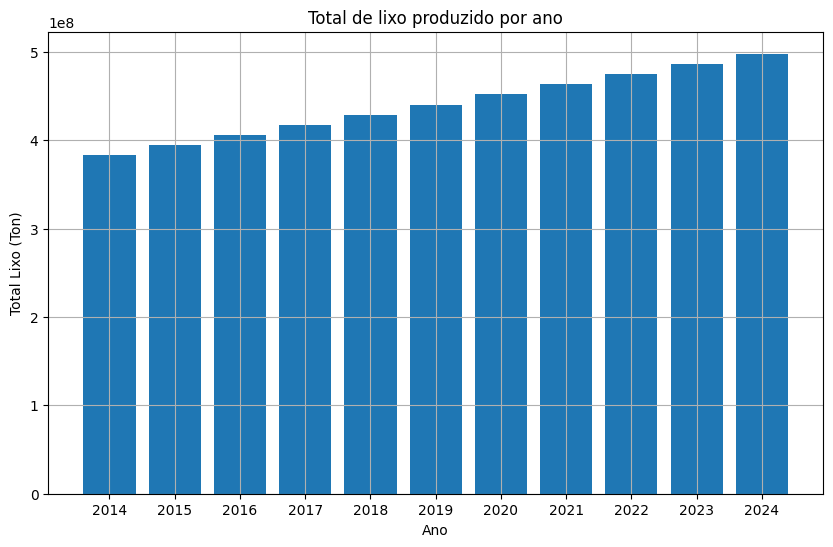

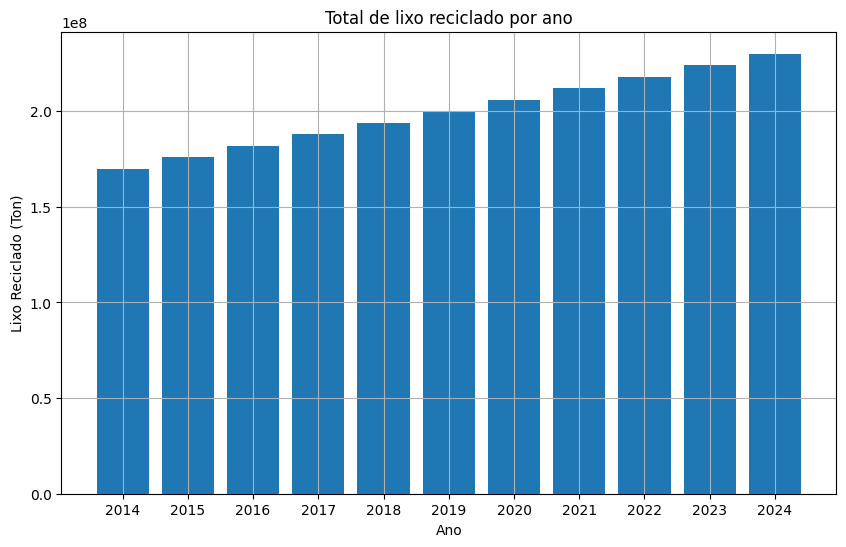

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados do arquivo CSV
df = pd.read_csv('../datasets/dataset_lixo2.csv')

# Converter ano para string para facilitar a plotagem
df['Ano'] = df['Ano'].astype(str)

# Função para gerar gráfico de linha
def plot_line_chart(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Função para gerar gráfico de barras
def plot_bar_chart(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Gráfico de barras: Total de lixo produzido por ano
plot_bar_chart(df['Ano'], df['Total Lixo (Ton)'], 'Total de lixo produzido por ano', 'Ano', 'Total Lixo (Ton)')

# Gráfico de barras: Total de lixo reciclado por ano
plot_bar_chart(df['Ano'], df['Lixo Reciclado (Ton)'], 'Total de lixo reciclado por ano', 'Ano', 'Lixo Reciclado (Ton)')



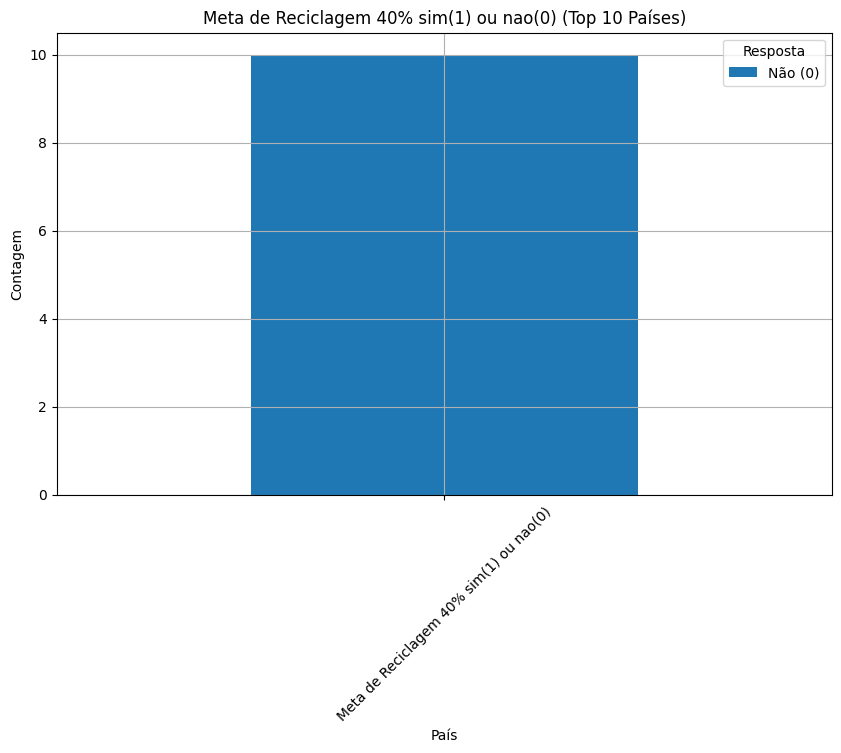

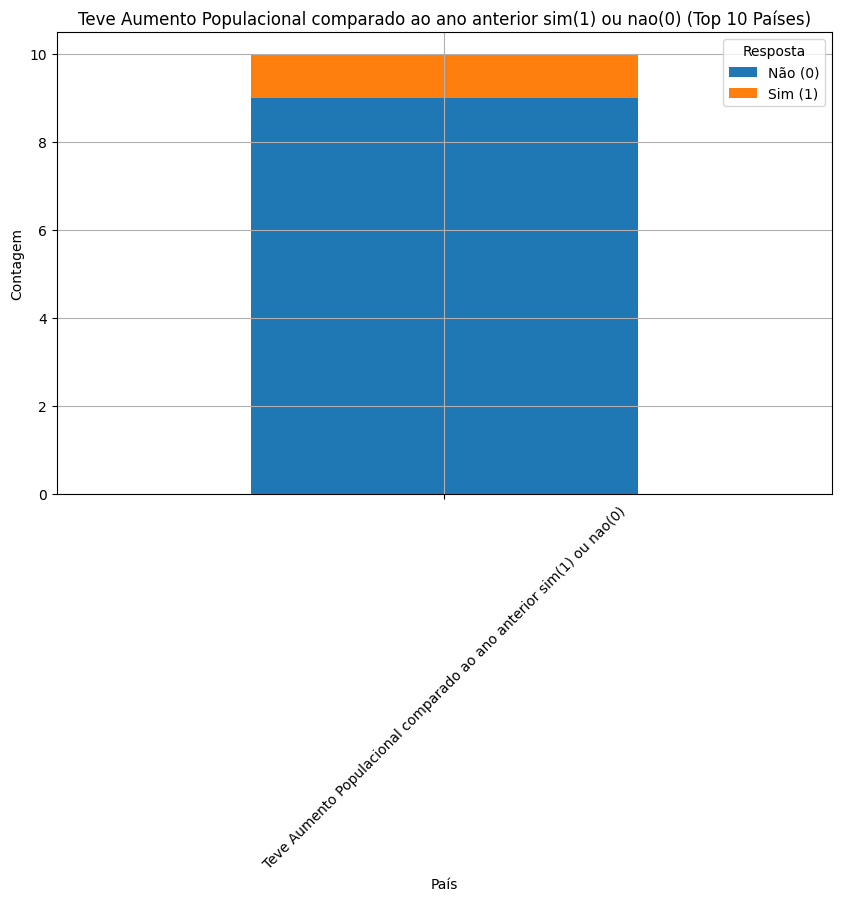

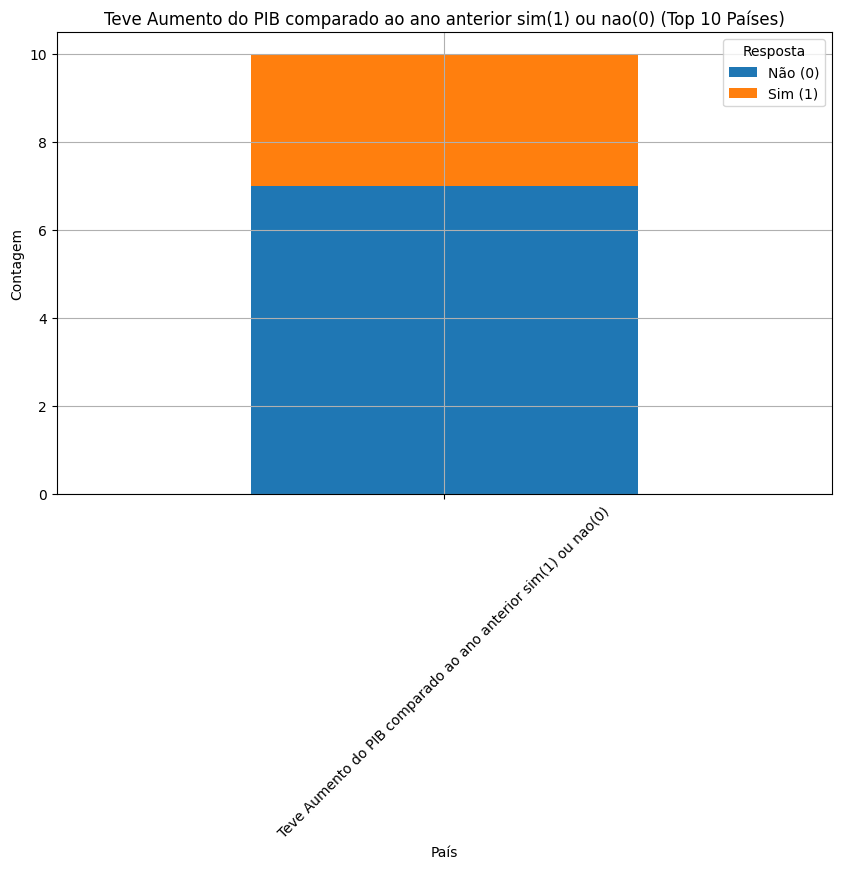

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar dados do arquivo CSV
df = pd.read_csv('../datasets/dataset_lixo2.csv')

# Assumindo que o arquivo CSV tem as colunas 'País', 'Meta de Reciclagem 40% sim(1) ou nao(0)', 'Teve Aumento Populacional comparado ao ano anterior sim(1) ou nao(0)', 'Teve Aumento do PIB comparado ao ano anterior sim(1) ou nao(0)'
# Filtrar os top 10 países de acordo com algum critério, por exemplo, população ou PIB (aqui assumimos os 10 primeiros do arquivo)
top_10 = df.head(10)

# Função para gerar gráficos de barras empilhadas para cada coluna binária
def plot_stacked_bar(data, title):
    counts = data.apply(pd.Series.value_counts).T
    counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(title)
    plt.xlabel('País')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.legend(title='Resposta', labels=['Não (0)', 'Sim (1)'])
    plt.grid(True)
    plt.show()

# Gráfico para "Meta de Reciclagem 40% sim(1) ou nao(0)"
plot_stacked_bar(top_10[['País', 'Meta de Reciclagem 40% sim(1) ou nao(0)']].set_index('País'), 'Meta de Reciclagem 40% sim(1) ou nao(0) (Top 10 Países)')

# Gráfico para "Teve Aumento Populacional comparado ao ano anterior sim(1) ou nao(0)"
plot_stacked_bar(top_10[['País', 'Teve Aumento Populacional comparado ao ano anterior sim(1) ou nao(0)']].set_index('País'), 'Teve Aumento Populacional comparado ao ano anterior sim(1) ou nao(0) (Top 10 Países)')

# Gráfico para "Teve Aumento do PIB comparado ao ano anterior sim(1) ou nao(0)"
plot_stacked_bar(top_10[['País', 'Teve Aumento do PIB comparado ao ano anterior sim(1) ou nao(0)']].set_index('País'), 'Teve Aumento do PIB comparado ao ano anterior sim(1) ou nao(0) (Top 10 Países)')


meta_quarenta
0    1053
1     190
Name: count, dtype: int64
meta_quarenta
1    10
Name: count, dtype: int64
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1053
           1       0.00      0.00      0.00       190

    accuracy                           0.85      1243
   macro avg       0.42      0.50      0.46      1243
weighted avg       0.72      0.85      0.78      1243



c:\Users\Rafael\Desktop\Projetos\Python\IA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafael\Desktop\Projetos\Python\IA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafael\Desktop\Projetos\Python\IA\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

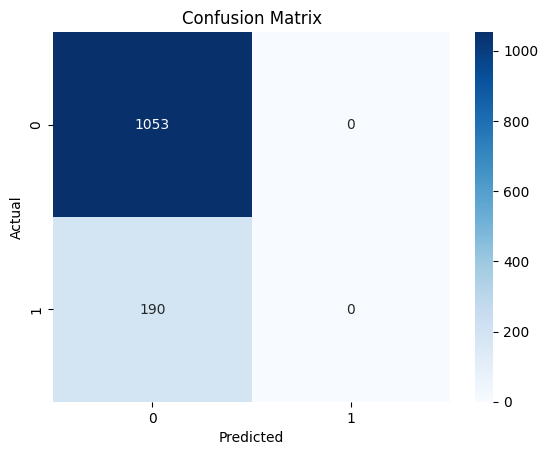

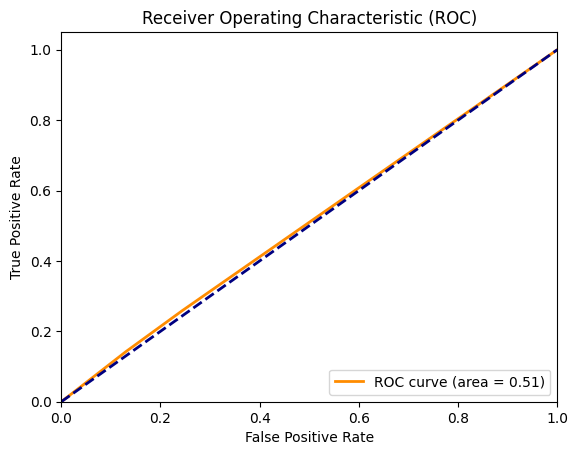

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Carregar dados do arquivo CSV
df = pd.read_csv('../datasets/dataset_lixo2.csv')

# Renomear as colunas
df.rename(columns={
    'Meta de Reciclagem 40% sim(1) ou nao(0)': 'meta_quarenta',
    'Teve Aumento Populacional comparado ao ano anterior sim(1) ou nao(0)': 'aumento_populacional',
    'Teve Aumento do PIB comparado ao ano anterior sim(1) ou nao(0)': 'aumento_pib'
}, inplace=True)

# Verificar a distribuição das classes
print(df['meta_quarenta'].value_counts())

# Verificar se há amostras de ambas as classes
if df['meta_quarenta'].nunique() < 2:
    raise ValueError("O conjunto de dados deve conter pelo menos duas classes diferentes na coluna 'meta_quarenta'.")

# Selecionar as colunas relevantes
features = ['aumento_populacional', 'aumento_pib']
target = 'meta_quarenta'

# Filtrar os top 10 países ou trabalhar com todos os dados
top_10 = df.head(10)

# Verificar a distribuição das classes nos top 10 países
print(top_10['meta_quarenta'].value_counts())

# Se não houver classes balanceadas nos top 10, usar todo o conjunto de dados
X = df[features]
y = df[target]

# Treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X, y)

# Prever os valores
y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

# Avaliar o modelo
print("Classification Report:")
print(classification_report(y, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = roc_auc_score(y, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
 [[157   4]
 [  0 139]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       161
           1       0.97      1.00      0.99       139

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



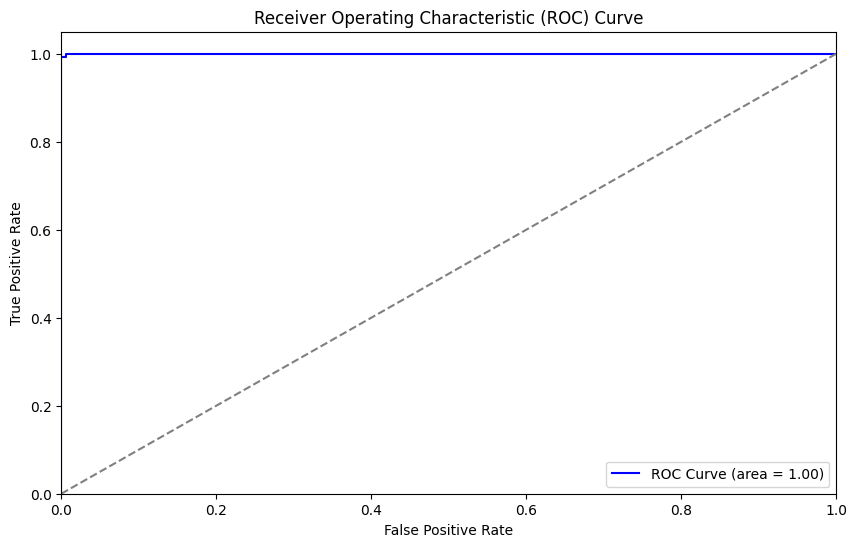

c:\Users\Rafael\Desktop\Projetos\Python\IA\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


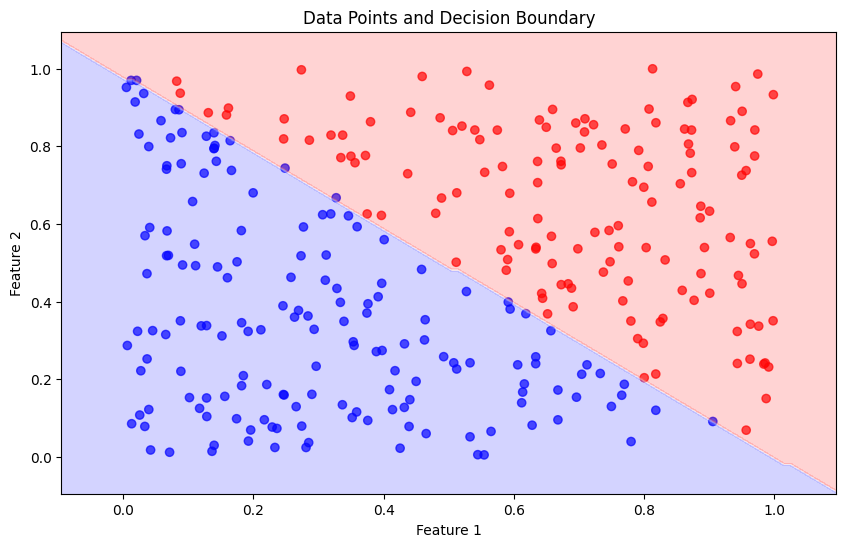

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Gerar um dataset fictício
np.random.seed(42)
data_size = 1000
X = np.random.rand(data_size, 2)  # Duas características
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Rótulo binário baseado na soma das características

# Criar um DataFrame
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df[['Feature1', 'Feature2']], df['Target'], test_size=0.3, random_state=42)

# Ajustar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Relatório de classificação
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotar a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plotar os dados e a fronteira de decisão
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Feature1'], X_test['Feature2'], c=y_test, cmap='bwr', alpha=0.7)
x_min, x_max = X_test['Feature1'].min() - .1, X_test['Feature1'].max() + .1
y_min, y_max = X_test['Feature2'].min() - .1, X_test['Feature2'].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points and Decision Boundary')
plt.show()

Confusion Matrix:
 [[261  60]
 [ 49   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       321
           1       0.05      0.06      0.05        52

    accuracy                           0.71       373
   macro avg       0.44      0.44      0.44       373
weighted avg       0.73      0.71      0.72       373



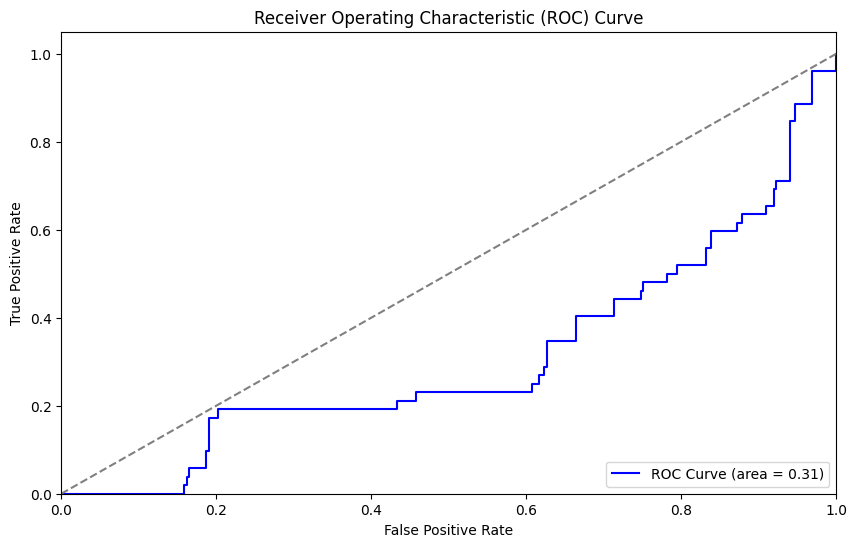

            Feature   Coefficient
0         PIB (US$) -9.085079e-14
1         População -1.341286e-09
2  Total Lixo (Ton)  4.054093e-09


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Criar o DataFrame
df = pd.read_csv('../datasets/dataset_lixo2.csv')

# Selecionar as colunas para a regressão logística
features = ['PIB (US$)', 'População', 'Total Lixo (Ton)']
target = 'Meta de Reciclagem 40% sim(1) ou nao(0)'

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

# Ajustar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Relatório de classificação
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotar a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Visualizar os coeficientes da regressão logística
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
print(coefficients)
